In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from sklearn.metrics import r2_score

In [123]:
temp =  pd.read_csv('Gapfilled data/gap_filled_data_ta_rh.csv')
metadata = pd.read_csv('Gapfilled data/station_metadata.csv', index_col=0)
height = pd.read_csv('height.csv')

In [124]:
metadata

,station_long_name,station_type,station_lat,station_lon,station_elevation,local_climate_zone,urban_atlas_class,urban_atlas_code
station_id,,,,,,,,
FRASHA,Station Freiburg Alte Stadthalle (FRASHA),Tier_I,47.986557,7.870209,296.034985,6 (Open lowrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210
FRBETZ,Station Freiburg Betzenhausen (FRBETZ),Tier_II,48.004900,7.817673,250.492999,5 (Open midrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210
FRBRUH,Station Freiburg Brühl (FRBRUH),Tier_I,48.031009,7.854189,237.624997,8 (Large lowrise),"Industrial, commercial, public, military and p...",12100
FRDIET,Station Freiburg Dietenbach (FRDIET),Tier_II,48.013766,7.792878,230.030002,"C (Bush, scrub)",Construction sites,13300
FRDREI,Station Freiburg Dreisam (FRDREI),Tier_I,47.995872,7.826545,260.060010,6 (Open lowrise),Other roads and associated land,12220
FREBNE,Station Freiburg Ebnet (FREBNE),Tier_I,47.983431,7.922671,340.285779,"C (Bush, scrub)",Pastures,23000
FREICH,Station Freiburg Eichkopf (FREICH),Tier_II,47.954049,7.882986,694.827991,A (Dense trees),Forests,31000
FRFRIE,Station Freiburg Hauptfriedhof (FRFRIE),Tier_II,48.010887,7.841538,257.017993,9 (Sparsely built),Green urban areas,14100
FRGART,Station Freiburg Gartenstadt (FRGART),Tier_II,47.986798,7.824259,262.259998,6 (Open lowrise),Discontinuous medium density urban fabric (S.L...,11220


In [125]:
temp = temp[temp['variable']=='Ta_deg_C']
temp['datetime_UTC'] = pd.to_datetime(temp['datetime_UTC'])

In [127]:
temp

,datetime_UTC,station_id,variable,value,data_type
0,2022-09-01 00:00:00+00:00,FRASHA,Ta_deg_C,14.78,imputed
1,2022-09-01 00:00:00+00:00,FRBETZ,Ta_deg_C,16.85,observed
2,2022-09-01 00:00:00+00:00,FRBRUH,Ta_deg_C,16.33,observed
3,2022-09-01 00:00:00+00:00,FRDIET,Ta_deg_C,13.98,observed
4,2022-09-01 00:00:00+00:00,FRDREI,Ta_deg_C,16.61,observed
...,...,...,...,...,...
359442,2023-09-01 06:00:00+00:00,FRWEIN,Ta_deg_C,19.02,observed
359443,2023-09-01 06:00:00+00:00,FRWILD,Ta_deg_C,18.68,observed
359444,2023-09-01 06:00:00+00:00,FRWITT,Ta_deg_C,17.59,observed
359445,2023-09-01 06:00:00+00:00,FRWSEE,Ta_deg_C,18.80,observed


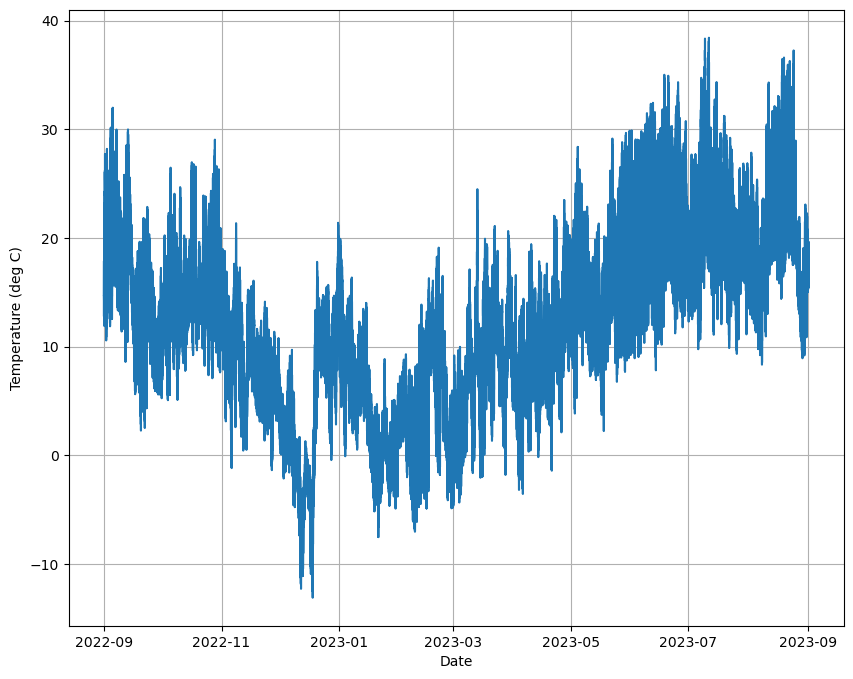

In [136]:
plt.figure(figsize=(10,8))
plt.plot(temp['datetime_UTC'],temp['value'])
plt.xlabel('Date')
plt.ylabel('Temperature (deg C)')
plt.grid()
plt.savefig('Graphs/temp.png',bbox_inches='tight')
plt.show()

In [9]:
yrly_avg = temp[['station_id','value']].groupby(['station_id']).mean()
yrly_avg = yrly_avg.merge(metadata, on='station_id')
yrly_avg.loc[yrly_avg['station_type']=='Tier_I', 'error'] = 0.6
yrly_avg.loc[yrly_avg['station_type']=='Tier_II', 'error'] = 0.3

In [10]:
# select all but FRTECH column
height = height[height.columns.difference(['FRTECH'])]
#rename Unnamed 0 to radius
height = height.rename(columns={'Unnamed: 0': 'Radius'})

In [11]:
def linearFunc(x,intercept,slope):
    """This function defines the function to be fit. In this case a linear function.
    
    Parameters
    ----------
    x : independent variable
    slope : slope
    intercept : intercept
    
    Returns
    -------
    y : dependent variable
    """
    y = intercept + slope * x
    return y

Example for radius of 100m

In [20]:
height

,FRASHA,FRBETZ,FRBRUH,FRDIET,FRDREI,FREBNE,FREICH,FRFRIE,FRGART,FRGLBA,...,FRUNIK,FRUWIE,FRVAUB,FRWAHS,FRWEIN,FRWILD,FRWITT,FRWSEE,FRZAHR,Radius
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.390000,...,NaN,NaN,NaN,NaN,13.377000,NaN,NaN,NaN,10.000000,20
2,4.999000,NaN,2.759000,NaN,NaN,NaN,NaN,3.372000,8.787000,8.695333,...,NaN,9.000000,5.246000,NaN,13.377000,NaN,NaN,7.065750,9.056500,30
3,5.787800,17.980000,2.759000,NaN,NaN,NaN,NaN,3.609500,8.587750,8.795833,...,NaN,9.584000,10.502167,NaN,13.377000,NaN,NaN,6.985429,6.582000,40
4,6.405000,19.033000,2.759000,NaN,16.022000,NaN,NaN,4.003600,8.564933,7.803500,...,17.311500,9.727600,11.206300,NaN,18.153500,NaN,NaN,7.237750,6.010615,50
5,6.513412,19.033000,2.759000,NaN,16.125333,NaN,NaN,4.003600,8.583962,7.252875,...,17.182333,9.890667,11.416385,NaN,16.207333,NaN,NaN,6.504286,5.715500,60
6,7.540208,18.682833,6.415600,2.942000,16.227750,NaN,NaN,4.003600,8.592028,7.492947,...,17.182333,9.554609,11.908654,NaN,16.617400,NaN,NaN,6.762462,5.975952,70
7,7.928437,19.205500,6.415600,2.942000,16.637667,NaN,NaN,4.003600,8.610405,8.002783,...,17.182333,9.664185,11.859844,NaN,16.249875,NaN,NaN,6.790800,5.968207,80
8,8.058872,16.597846,7.013000,2.942000,16.704286,NaN,NaN,4.003600,8.627457,7.806690,...,17.083250,10.052417,11.664235,NaN,16.788667,NaN,NaN,6.765415,5.970585,90
9,8.116636,16.560875,8.025375,2.942000,16.579333,NaN,NaN,4.003600,8.574971,7.933912,...,17.150200,10.939380,11.777289,NaN,15.066625,NaN,NaN,6.813407,5.443000,100


In [31]:
x = height.loc[height['Radius'] == 100].squeeze()[:-1]
y = yrly_avg['value']
y_err = yrly_avg['error']

mask = ~np.isnan(x) & ~np.isnan(y)

In [95]:
a_fit,cov=curve_fit(linearFunc,x[mask], y[mask],sigma=y_err[mask],absolute_sigma=True)

inter = a_fit[0]
slope = a_fit[1]
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])

In [72]:
r = 100

In [110]:
height['Radius'][5:]

5        60
6        70
7        80
8        90
9       100
10      120
11      140
12      160
13      180
14      200
15      250
16      300
17      400
18      500
19      750
20     1000
21     1500
22     2000
23     5000
24    10000
Name: Radius, dtype: int64

20


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

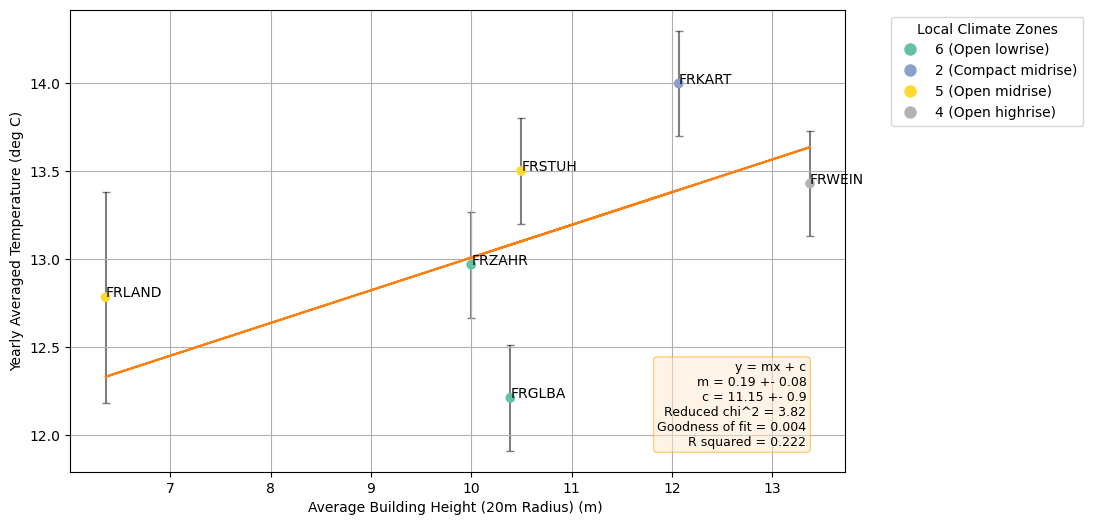

30


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

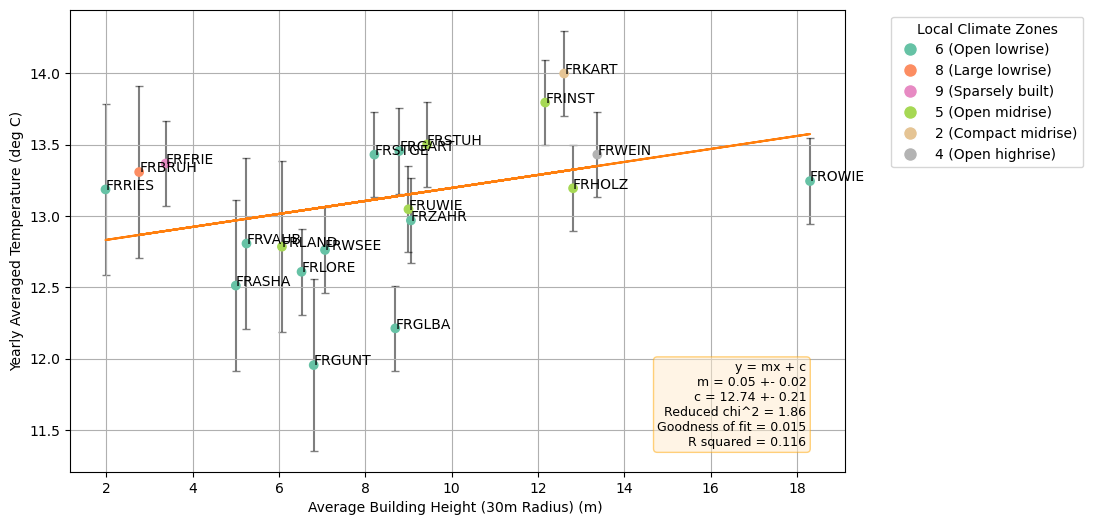

40


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

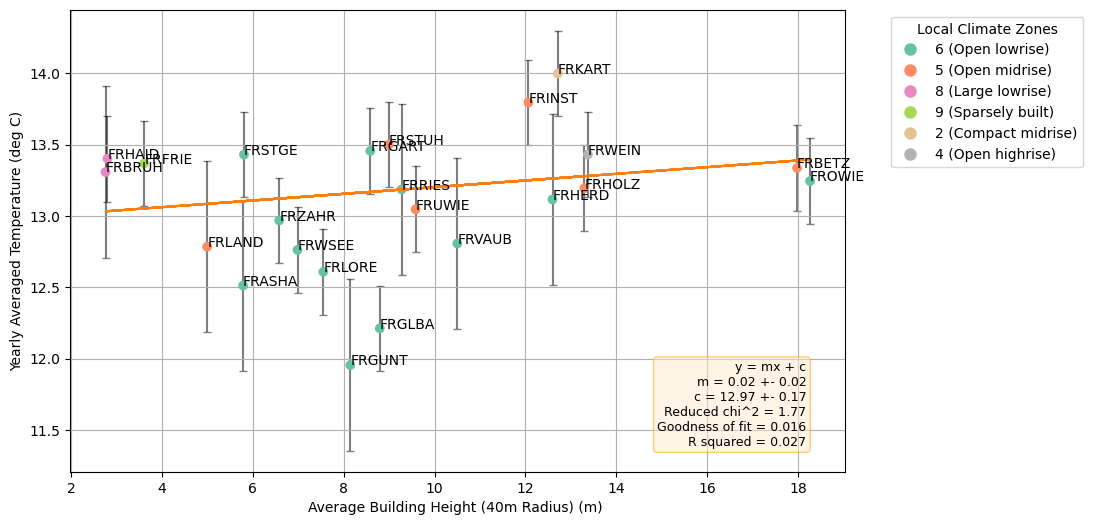

50


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

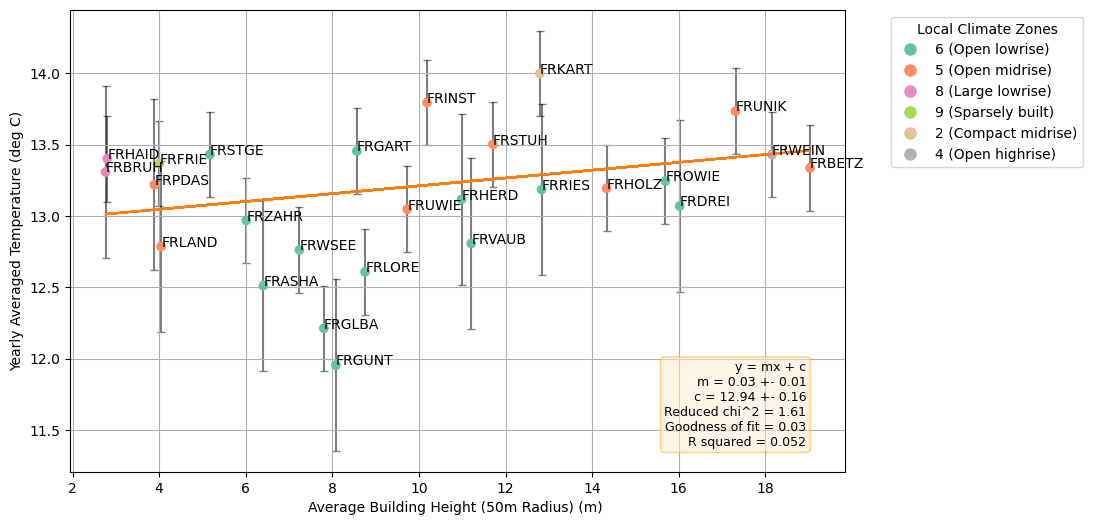

60


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

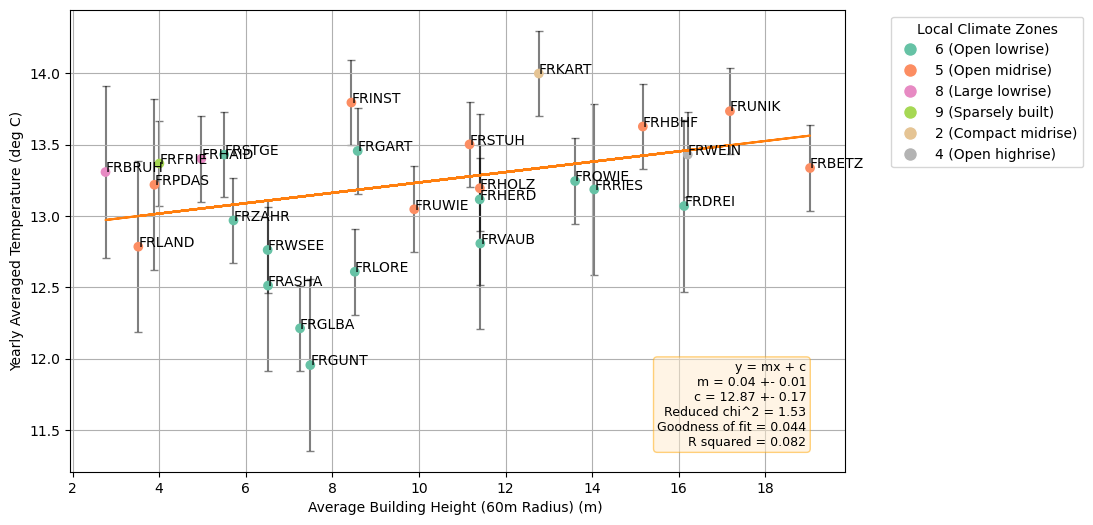

70


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

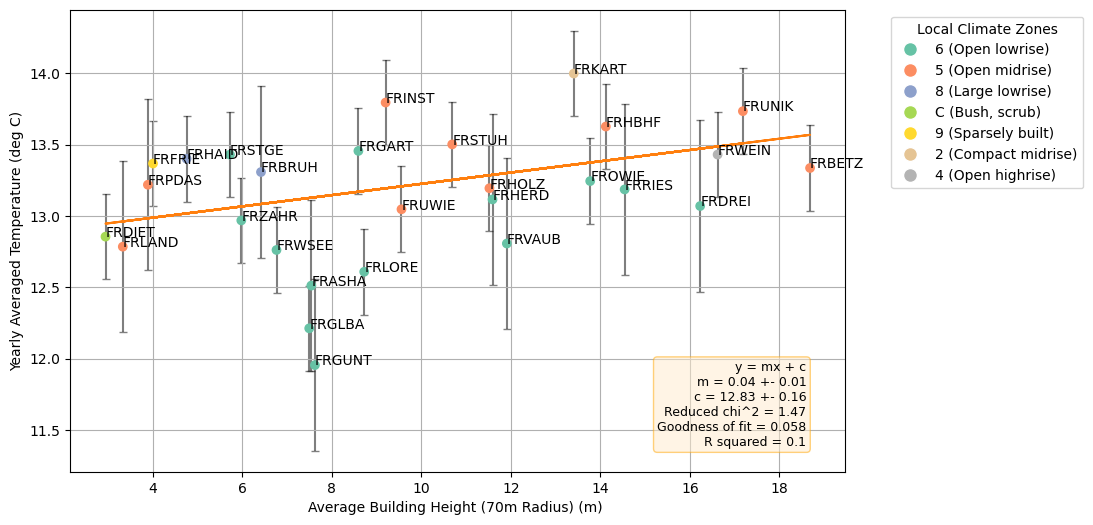

80


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

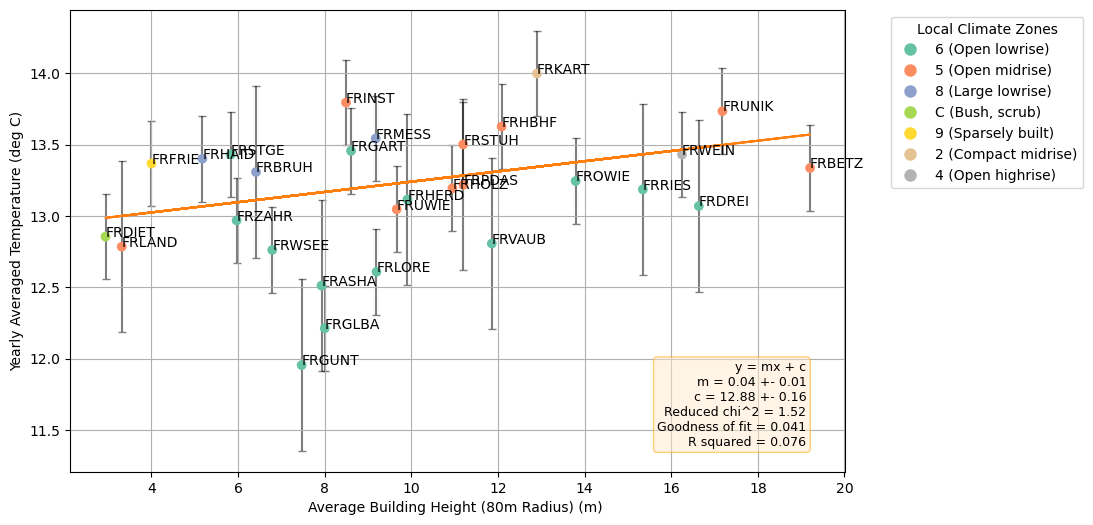

90


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

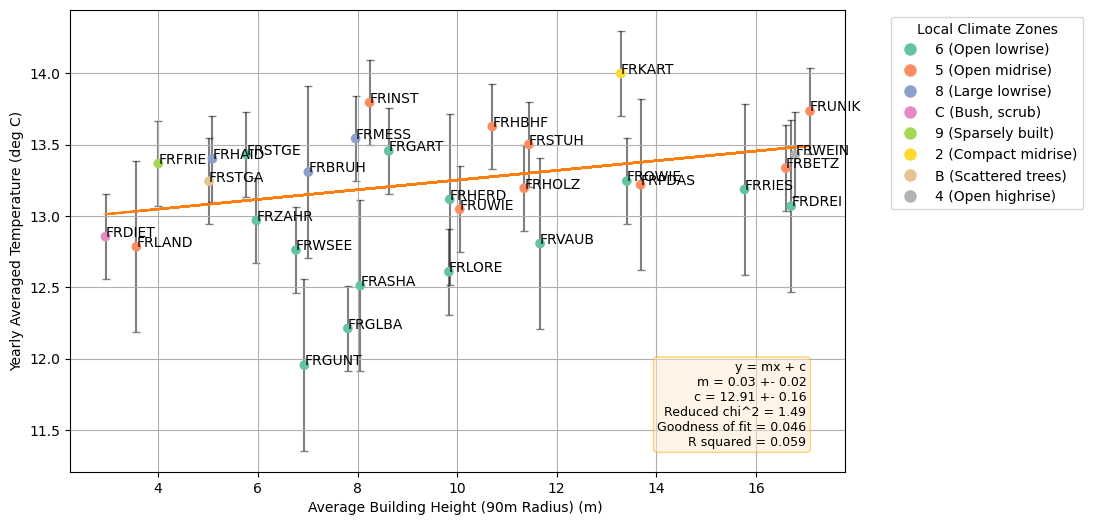

100


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

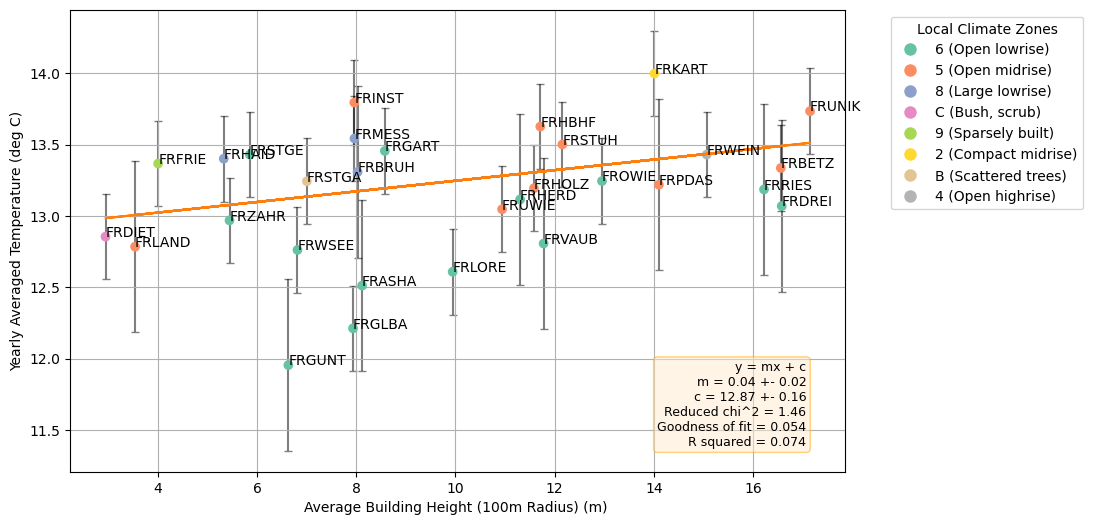

120


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

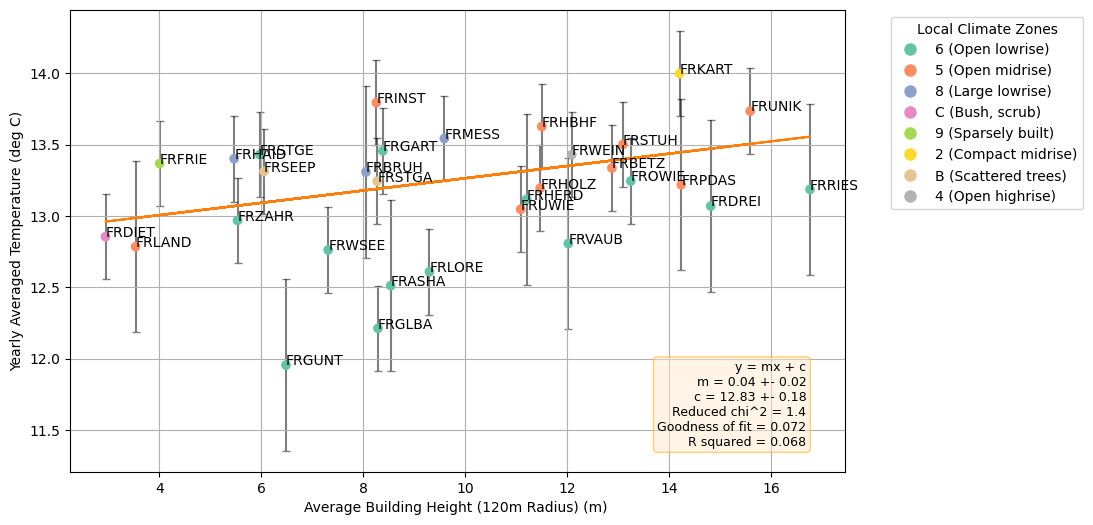

140


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

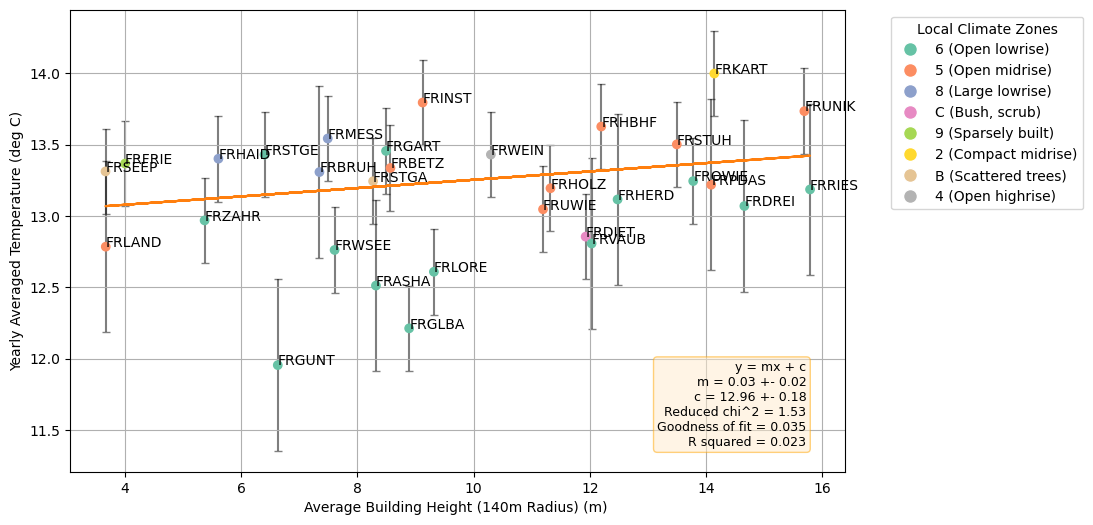

160


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

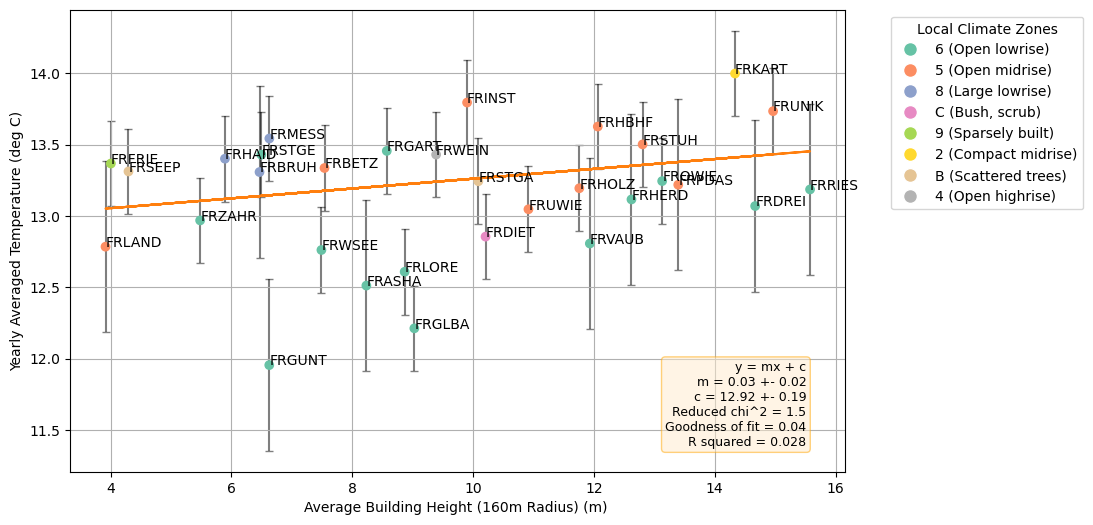

180


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

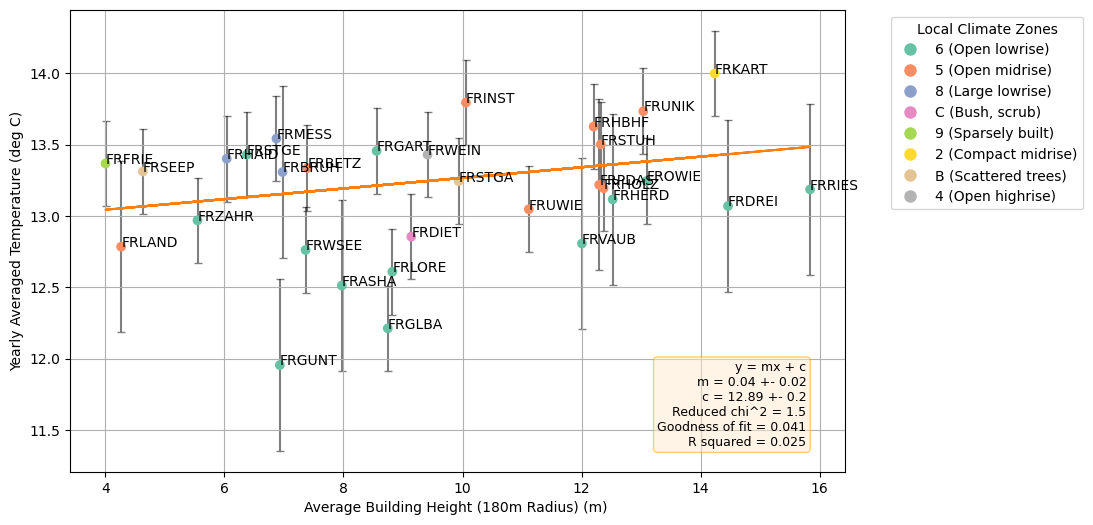

200


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

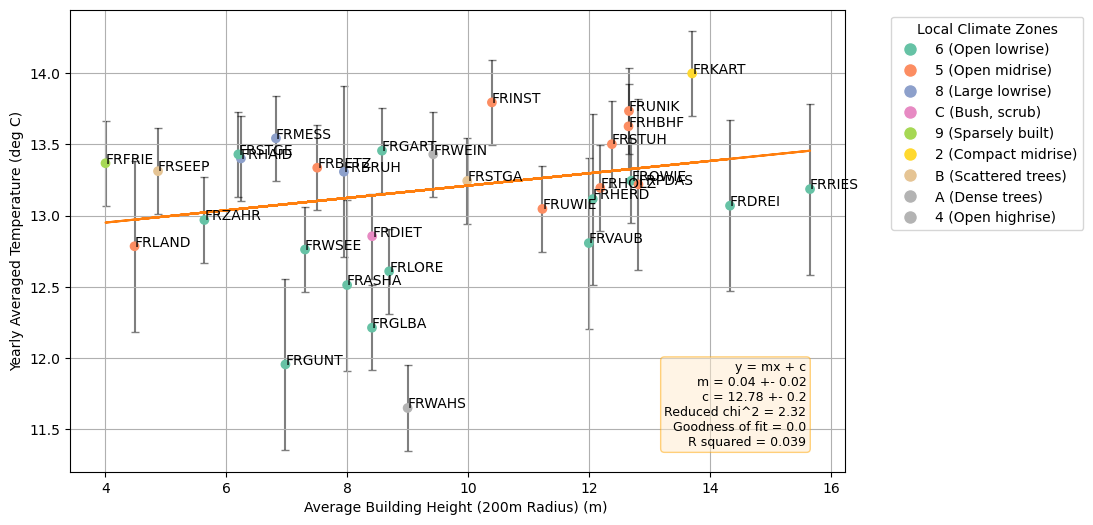

250


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

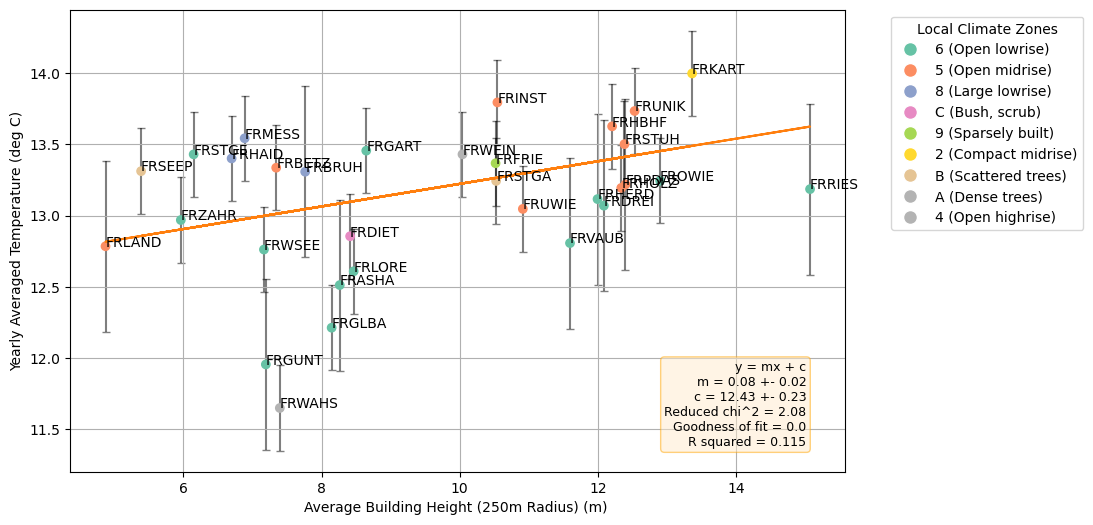

300


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

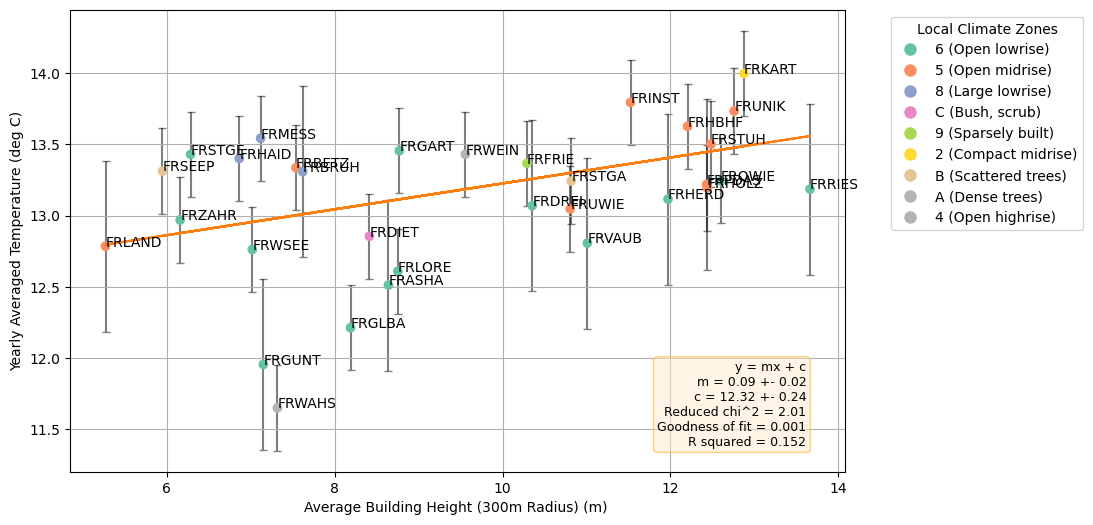

400


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

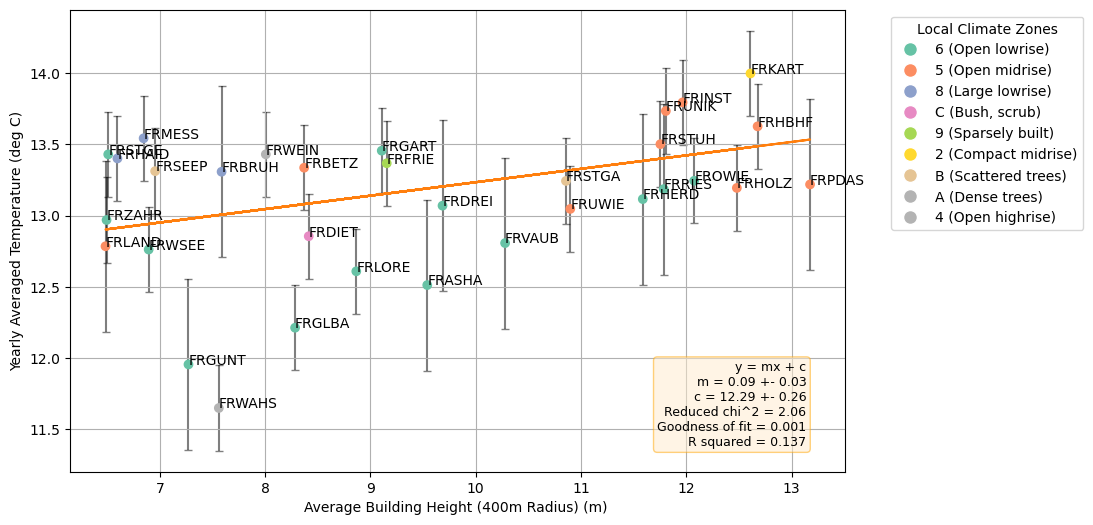

500


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

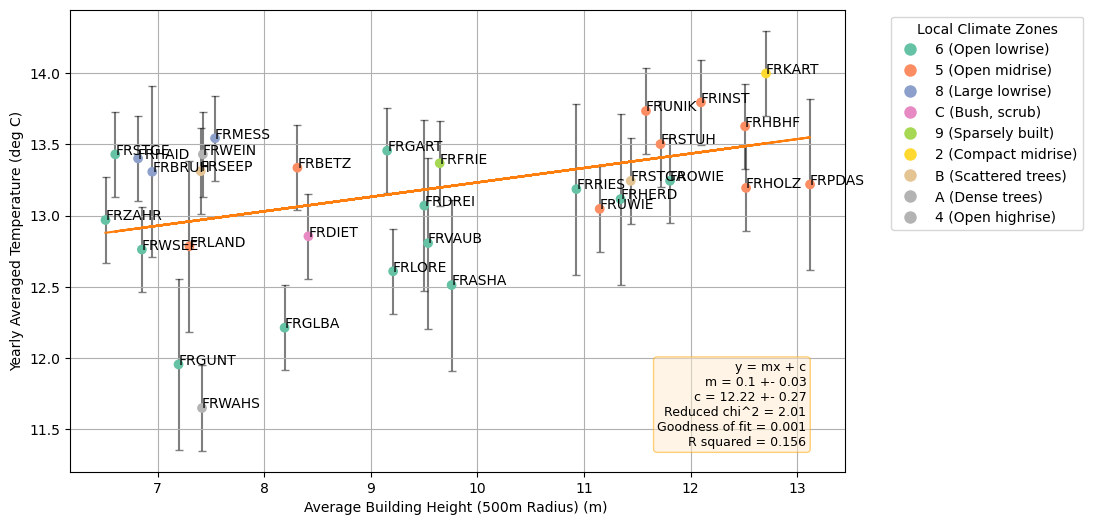

750


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

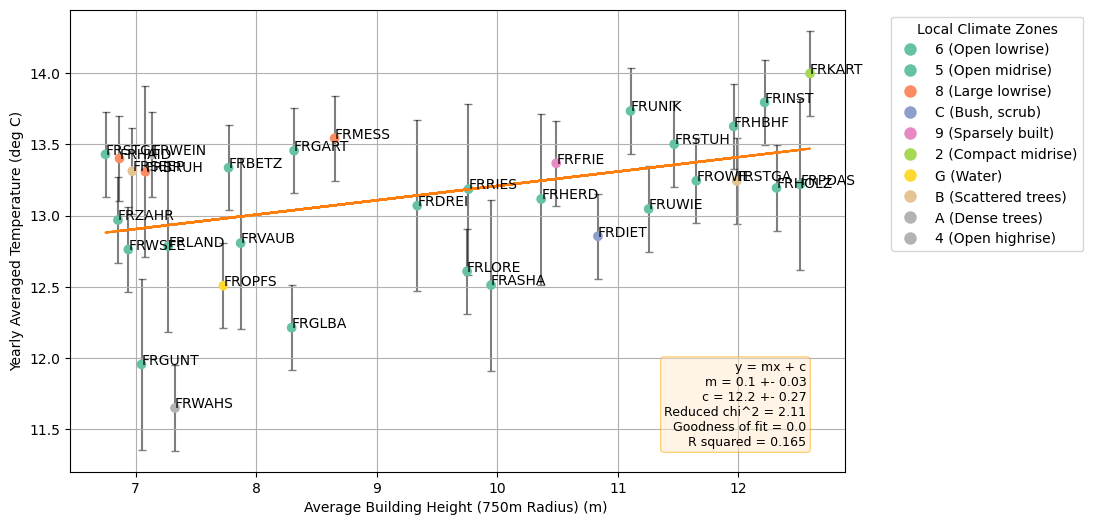

1000


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

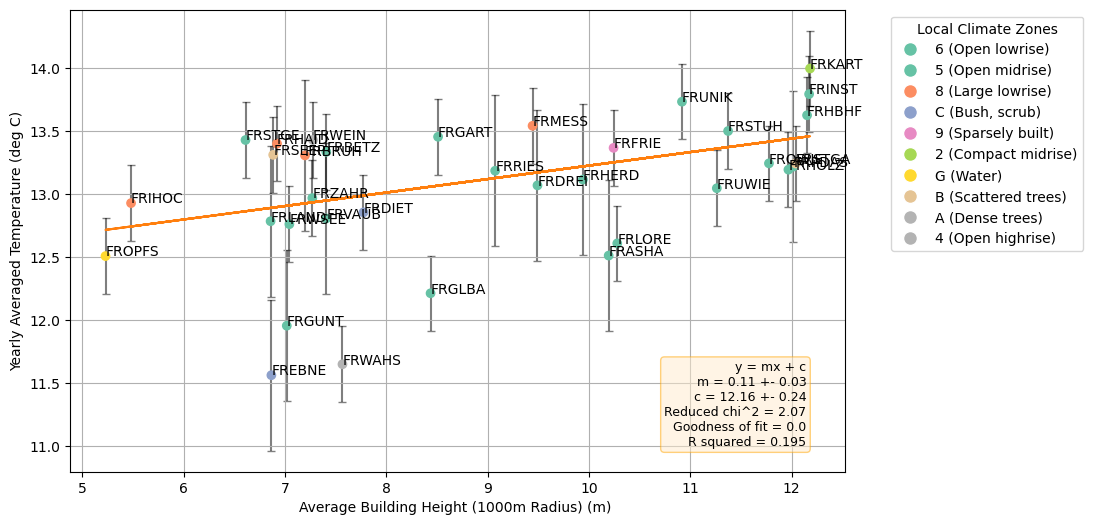

1500


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

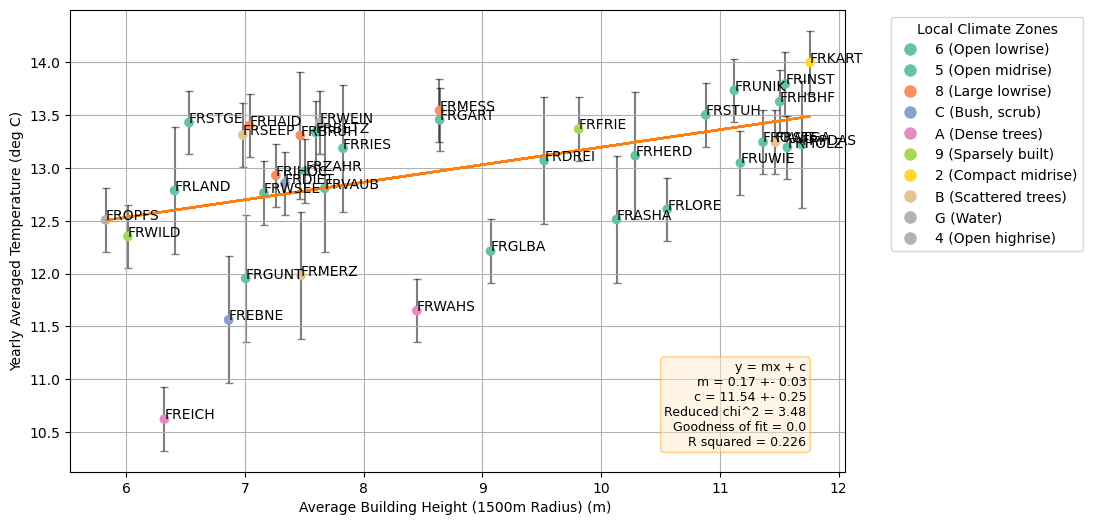

2000


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

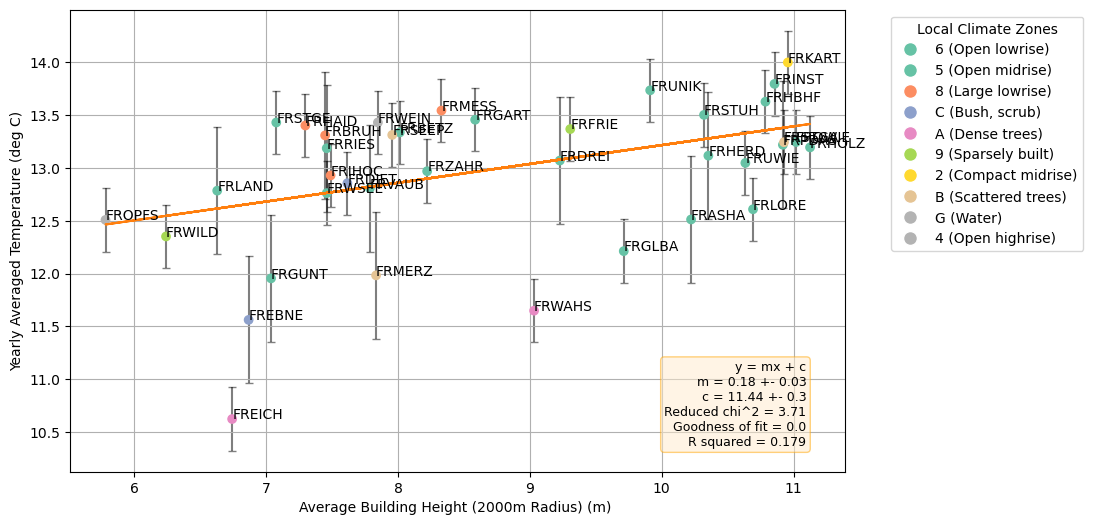

5000


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

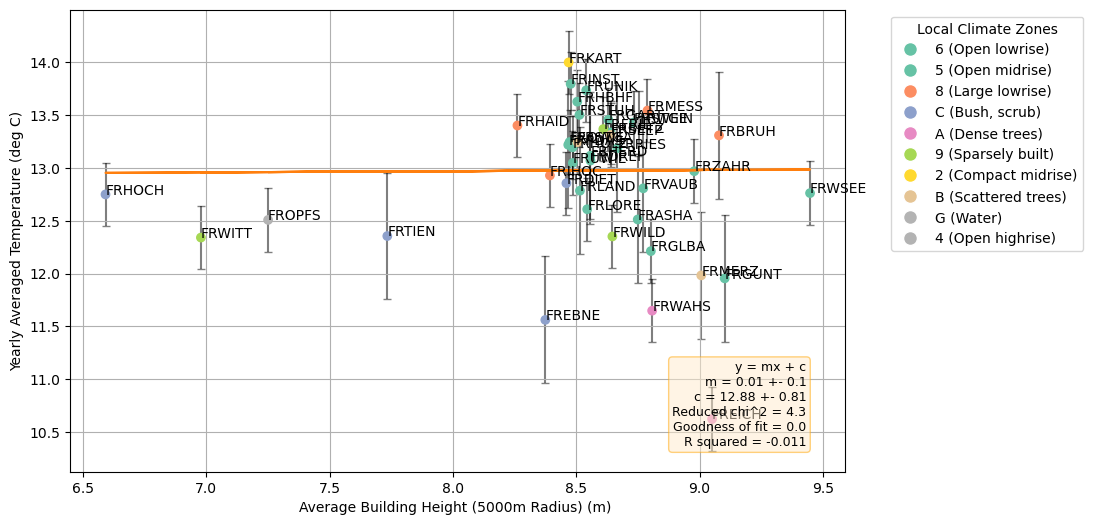

10000


/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2', len(unique_station_ids))
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if mask[i]:
/var/folders/x_/j9q17vrn0kbcj5x0_xh931480000gn/T/ipykernel_17355/4210816092.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

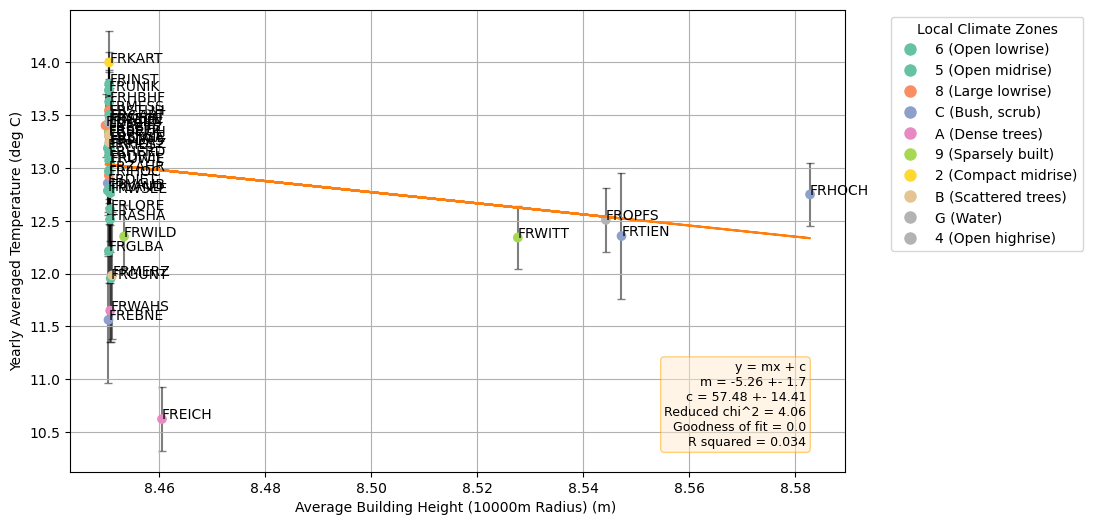

In [120]:
for r in height['Radius'][1:]:
    print(r)
    x = height.loc[height['Radius'] == r].squeeze()[:-1]
    y = yrly_avg['value']
    y_err = yrly_avg['error']

    mask = ~np.isnan(x) & ~np.isnan(y)

    a_fit,cov=curve_fit(linearFunc,x[mask], y[mask],sigma=y_err[mask],absolute_sigma=True)

    inter = a_fit[0]
    slope = a_fit[1]
    d_inter = np.sqrt(cov[0][0])
    d_slope = np.sqrt(cov[1][1])

    plt.figure(figsize=(10, 6))

    # Convert station IDs to a sequence of numbers for coloring
    station_ids = yrly_avg['local_climate_zone'][mask]
    unique_station_ids = station_ids.unique()

    # Create a colormap and assign a unique color to each station ID
    cmap = cm.get_cmap('Set2', len(unique_station_ids))
    color_dict = {station_id: cmap(i) for i, station_id in enumerate(unique_station_ids)}

    # Map the colors to the station IDs
    colors = [color_dict[station_id] for station_id in station_ids]

    # Create a graph showing the data.
    plt.errorbar(x[mask],y[mask],yerr=y_err[mask],marker=None,linestyle='',ecolor='black',alpha=0.5,capsize=3,zorder=1)

    # Compute a best fit line from the fit intercept and slope.
    yfit = linearFunc(x[mask],inter,slope)
    #yfit1 = inter1 + slope1*x[mask]

    scatter = plt.scatter(x[mask], y[mask], c=colors,zorder=2)

    # Create a graph of the fit to the data. We just use the ordinary plot
    # command for this.
    plt.plot(x[mask],yfit)

    # Display a legend, label the x and y axes and title the graph.
    plt.xlabel('Average Building Height ('+str(r)+'m Radius) (m) ')
    plt.ylabel('Yearly Averaged Temperature (deg C)')

    # Create a legend for the station IDs
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[station_id], markersize=10) for station_id in unique_station_ids]
    labels = unique_station_ids
    plt.legend(handles, labels, title='Local Climate Zones', bbox_to_anchor=(1.05, 1), loc='upper left')

    # add label of station ID to each point
    for i, txt in enumerate(yrly_avg.index):
        if mask[i]:
            plt.annotate(txt, (x[i], y[i]))

    plt.grid()

    ydata = y[mask]
    xdata = x[mask]
    d_y = y_err[mask]
    chisqr = sum((ydata-linearFunc(xdata,inter,slope))**2/d_y**2)
    dof = len(ydata) - 2
    chisqr_red = chisqr/dof
    GOF = 1. - chi2.cdf(chisqr,dof)

    # add text box for the statistics
    stats = ('y = mx + c\n'
                f'm = {round(slope,2)} +- {round(d_slope,2)}\n'
                f'c = {round(inter,2)} +- {round(d_inter,2)}\n'
                f'Reduced chi^2 = {round(chisqr_red,2)}\n'
                f'Goodness of fit = {round(GOF,3)}\n'
                f'R squared = {round(r2_score(ydata,linearFunc(xdata,inter,slope)),3)}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    # put text in bottom right corner scaled to axes
    plt.text(0.95, 0.05, stats, fontsize=9, bbox=bbox, horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)
    #plt.text(14,12, stats, fontsize=9, bbox=bbox, horizontalalignment='left')

    # Save the figure to a file
    plt.savefig('Temp_Height_'+str(r)+'m_Radius.png',dpi=300, bbox_inches='tight')

    # Show the graph in a new window on the users screen.
    plt.show()